In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Python\Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

In [4]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['MonthName'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

In [7]:
monthly_sales = df.groupby(
    pd.Grouper(key='Order Date', freq='ME')
)['Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']
monthly_sales.head()

,ds,y
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


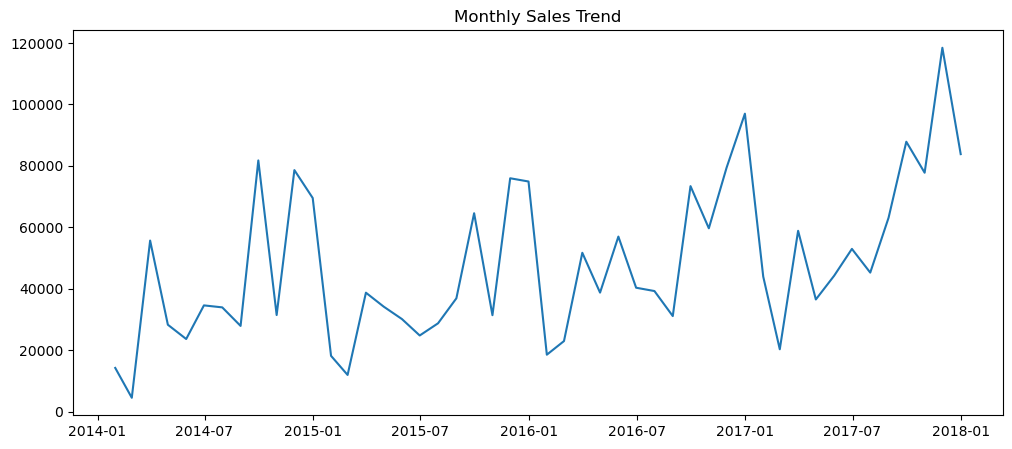

In [8]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['ds'], monthly_sales['y'])
plt.title("Monthly Sales Trend")
plt.show()

<Axes: title={'center': 'Yearly Sales'}, xlabel='Year'>

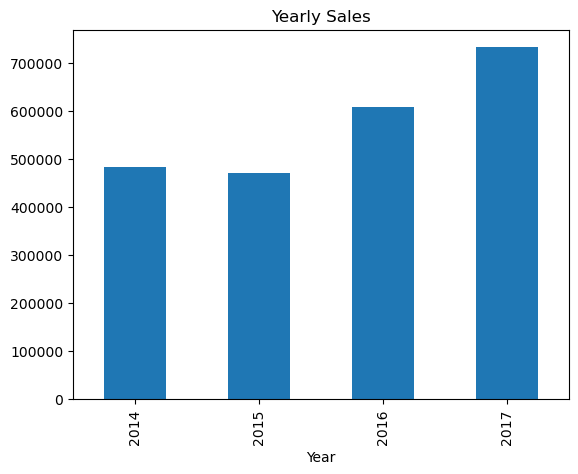

In [9]:
yearly_sales = df.groupby('Year')['Sales'].sum()
yearly_sales.plot(kind='bar', title="Yearly Sales")

<Axes: title={'center': 'Sales by Category'}, ylabel='Category'>

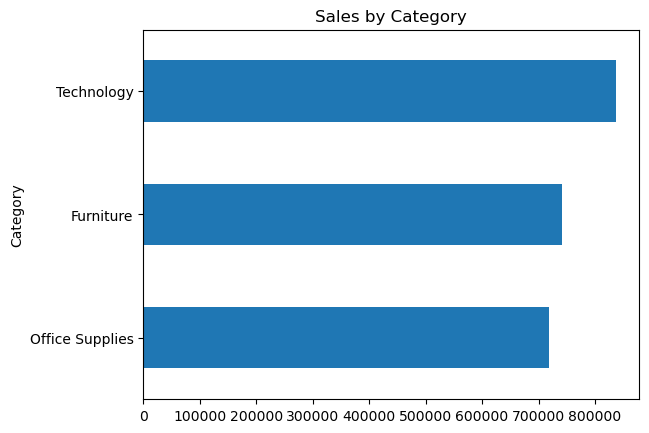

In [10]:
df.groupby('Category')['Sales'].sum().sort_values().plot(
    kind='barh', title="Sales by Category"
)

<Axes: ylabel='Sales'>

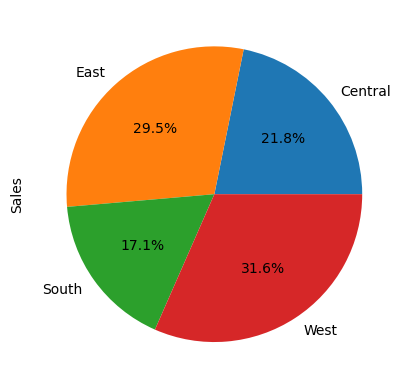

In [11]:
df.groupby('Region')['Sales'].sum().plot(
    kind='pie', autopct='%1.1f%%'
)

In [12]:
monthly_sales['rolling_3'] = monthly_sales['y'].rolling(3).mean()
monthly_sales['rolling_6'] = monthly_sales['y'].rolling(6).mean()
monthly_sales['lag_1'] = monthly_sales['y'].shift(1)
monthly_sales.dropna(inplace=True)

In [13]:
from prophet import Prophet
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
model.fit(monthly_sales[['ds', 'y']])

11:59:48 - cmdstanpy - INFO - Chain [1] start processing
11:59:49 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

C:\Users\User\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
50,2018-08-31,62131.384699,52339.312930,71092.170821
51,2018-09-30,98976.836282,89467.298934,109279.854710
52,2018-10-31,67552.462145,57880.122425,77509.049953
53,2018-11-30,109911.247791,100249.976803,119741.248376
54,2018-12-31,101817.530579,92040.613307,111147.389733


In [16]:
forecast_output = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_output.to_csv("forecast_results.csv", index=False)

In [17]:
import os
os.getcwd()

'C:\\Users\\User'